In [3]:
import pandas as pd

def clean_data(df):
    # Drop columns: 'Original Lockname', 'Lockname' and 11 other columns
    df = df.drop(columns=['Original Lockname', 'Lockname', 'Start Timestamp', 'End Timestamp', 'Start_Duration', 'End_Duration', 'curIntent', 'intent', 'mode', 'LOCK_OBJECT_TYPE    ', 'DATA_PARTITION_ID   ', 'TBSP_NAME           '])
    # Strip column names
    df.columns = df.columns.str.strip()
    return df

# Loaded variable 'df' from URI: /home/adam/Documents/GitHub/lock-pred/data/row_locks.csv
df = pd.read_csv('../data/row_locks.csv')

df_clean = clean_data(df.copy())
df_clean.head()

,ROWID,PAGEID,TABSCHEMA,TABNAME
0,3,4,SYSIBM,SYSDATATYPES
1,3,4,SYSIBM,SYSDATATYPES
2,3,4,SYSIBM,SYSDATATYPES
3,19,73301,DB2ADMIN,ORDER_LINE
4,20,73301,DB2ADMIN,ORDER_LINE


In [4]:
df_clean = df_clean.where(df_clean['PAGEID'] != df_clean['PAGEID'].shift()).dropna()
df_clean.head()

,ROWID,PAGEID,TABSCHEMA,TABNAME
0,3.0,4.0,SYSIBM,SYSDATATYPES
3,19.0,73301.0,DB2ADMIN,ORDER_LINE
18,5.0,70943.0,DB2ADMIN,ORDER_LINE
24,3.0,4.0,SYSIBM,SYSDATATYPES
25,31.0,76731.0,DB2ADMIN,ORDER_LINE


In [5]:
len(df_clean[df_clean['TABSCHEMA'] != 'SYSIBM'])
# export to csv

916

In [8]:
len(df_clean[df_clean['TABSCHEMA'] != 'SYSIBM']['PAGEID'].unique())

878

In [45]:
# export to csv
df_clean.to_csv('data/row_locks_nodupes.csv', index=False)


Number of rows in Small: 7393
Number of rows in Small, duplicates removed: 1256
Number of rows in Large: 71910
Number of rows in Large, duplicates removed: 12237


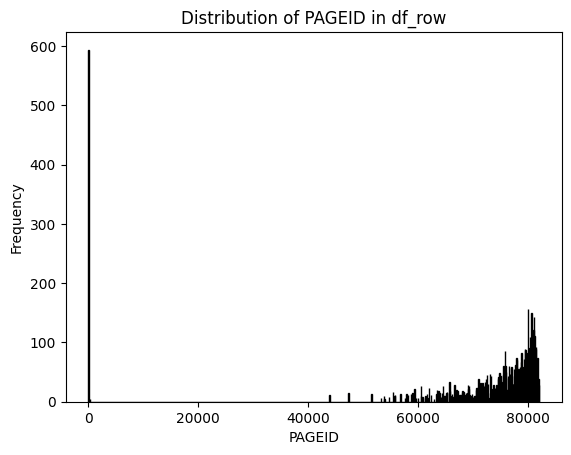

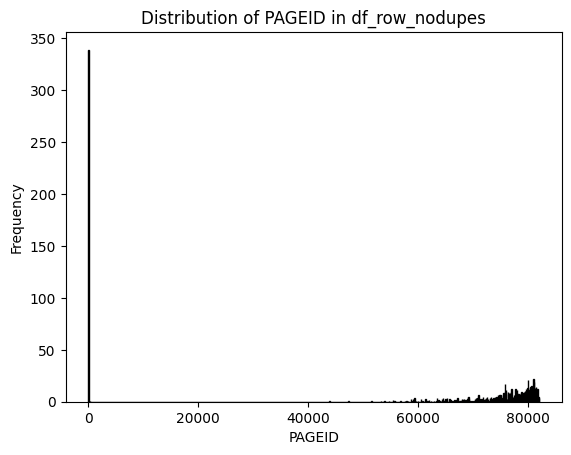

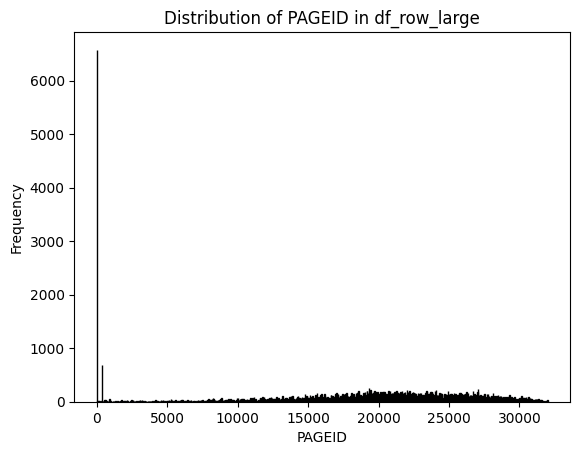

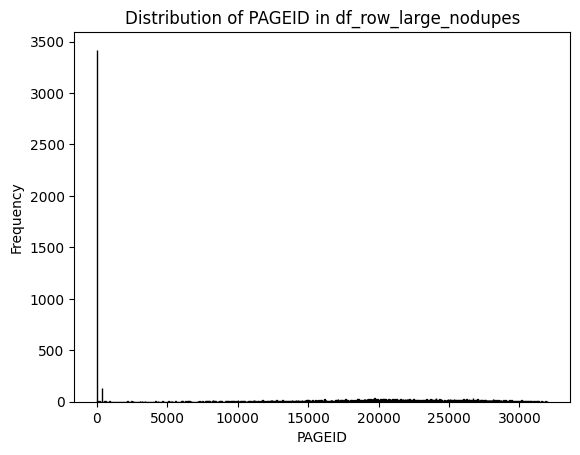

In [46]:
df_row, df_row_nodupes, df_row_large, df_row_large_nodupes = pd.read_csv('data/row_locks.csv'), pd.read_csv('data/row_locks_nodupes.csv'), pd.read_csv('data/row_locks_large.csv'), pd.read_csv('data/row_locks_large_nodupes.csv')

# strip spaces from column names
df_row.columns = df_row.columns.str.strip()
df_row_nodupes.columns = df_row_nodupes.columns.str.strip()
df_row_large.columns = df_row_large.columns.str.strip()
df_row_large_nodupes.columns = df_row_large_nodupes.columns.str.strip()

# print number of rows and the plot the distribution of pageids
print(f"Number of rows in Small: {len(df_row)}")
print(f"Number of rows in Small, duplicates removed: {len(df_row_nodupes)}")
print(f"Number of rows in Large: {len(df_row_large)}")
print(f"Number of rows in Large, duplicates removed: {len(df_row_large_nodupes)}")

# plot the distribution of pageids
import matplotlib.pyplot as plt

plt.hist(df_row['PAGEID'], bins=1000, edgecolor='black')
plt.title('Distribution of PAGEID in df_row')
plt.xlabel('PAGEID')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_row_nodupes['PAGEID'], bins=1000, edgecolor='black')
plt.title('Distribution of PAGEID in df_row_nodupes')
plt.xlabel('PAGEID')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_row_large['PAGEID'], bins=1000, edgecolor='black')
plt.title('Distribution of PAGEID in df_row_large')
plt.xlabel('PAGEID')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_row_large_nodupes['PAGEID'], bins=1000, edgecolor='black')
plt.title('Distribution of PAGEID in df_row_large_nodupes')
plt.xlabel('PAGEID')
plt.ylabel('Frequency')
plt.show()





In [10]:
df_results = pd.read_csv('results/exp-9/results_clean.csv')
df_results.head()


,model,data,train_data_percent_used,epochs,batch_size,learning_rate,seq_length,test_split,val_split,vocab_size,...,loss_mean,loss_std,accuracy_per_output_mean,accuracy_per_output_std,table_name_test_accuracy_mean,table_name_test_accuracy_std,pageid_test_accuracy_mean,pageid_test_accuracy_std,padding_test_accuracy_mean,padding_test_accuracy_std
0,transformer,data/row_locks_large_nodupes.csv,1.0,30,32,0.001,50,0.3,0.0,900,...,0.906599,0.007973,0.701056,0.003118,0.99904,0.0,0.006958,0.003070,0.977591,0.001109
1,transformer,data/row_locks_nodupes.csv,1.0,30,32,0.001,50,0.3,0.0,900,...,0.747359,0.004106,0.724877,0.002767,1.00000,0.0,0.005364,0.005768,1.000000,0.000000


In [13]:
# print actual accuracy metric and label the large and small nodupes and the horizon
print(f"Large dataset no duplicates Accuracy and std: {df_results['actual_test_accuracy_mean'].iloc[0]} ± {df_results['actual_test_accuracy_std'].iloc[0]}")
print(f"Small dataset no duplicates Accuracy and std: {df_results['actual_test_accuracy_mean'].iloc[1]} ± {df_results['actual_test_accuracy_std'].iloc[1]}")
print(f"Horizon (number of pageids to predict): {df_results['horizon'].iloc[0]}")



Large dataset no duplicates Accuracy and std: 0.0064779270633396 ± 0.0030704340723692
Small dataset no duplicates Accuracy and std: 0.0053639846743294 ± 0.005768372817694
Horizon (number of pageids to predict): 1
